# Interferometry

### Names: [Insert Names Here]
---

**New Code**
- Calculate the one-dimensional Fourier Transform of a series.
- Calculate the frequencies associated with the one-dimensional Fourier Transform.
- Calculate the amplitude of a complex number.
- Set the size of a figure.
- Read in a .png file.
- Calculate the two-dimensional Fourier Transform
- Calculate the two-dimensional inverse Fourier Transform


As we will see in class, the long wavelengths of radio emission make it difficult to obtain images at high spatial resolution. Spatial resolution can be improved by combining the signal from multiple telescopes to create a telescope with an effective resolution set by the distance between the telescopes. 

Consider two radio telescopes, separated by a distance $u_1$, and imagine the wave-like photons from an object directly overhead arriving at these two telescopes. If the object is directly overhead, the photons will arrive at the two telescopes at the same time, and when we multiply the two signals together they will *constructively interfere* to create a strong signal. 

But what if the object is not directly overhead? If it is at an angle $\theta$ from directly overhead, then the photons will not arrive at the two telescopes at the exact same time. If the angle $\theta$ is just right, then the peak of the wave-photon will arrive at one telescope will arrive just as the minimum arrives at the other telescope. When we combine the signal from the two telescopes, they will *destructively interfere* resulting in zero signal!

The angle $\theta$ at which the signals destructively interfere depends on the distance between the telescopes. For telescopes close together, $\theta$ has to be large before the signals destructively interfere. If the telescopes are far apart $\theta$ is small before the signals destructively interfere. This leads to the central principle of radio interferometric telescopes:

**Telescopes separated by different distances are sensitive to features of different sizes on the sky, with closely spaced telescopes sensitive to large features on the sky and far apart telescopes sensitive to small features on the sky.**


But each pair of antennas is only sensitive to features of a particular size. How does that help create an image, which might have features of all sorts of different sizes? Here we rely on *Fourier Transforms*. A Fourier transform says that anything (e.g., a one-dimensional signal, an image of your favortie cat) can be broken down into a collection of sine and cosine curves of different frequencies. Given an infinite number of sine and cosine curves we can fully represent an image. In our case, telescopes that are far apart provide information on the high frequency sine and cosine curves, while telescopes that are close together provide information on the low frequency sine and cosine curves. 

It would be great if we had an infinite number of telescopes covering an infinite number of frequencies. Then it would be easy to create images! Sadly, that is not the case. So how do we handle the fact that we have a finite number of telescopes, that tell us about a finite number of frequencies? (Hint: Carefully)

In this lab you will explore Fourier transforms, and how incomplete spatial information can complicate our ability to interpret images of the sky. By the end of this lab you will *not* be expected to be able to calculate a Fourier transform, or even to write out the equation of a Fourier transform. You will be expected to be able to describe how spatial scales on the sky correspond to antenna separations on the ground, and how antenna spacings affect what we see on the sky. 

### Fourier transforms

Let us start by talking about Fourier Transforms. At the heart of a Fourier Transform is a term that looks like this:

$\exp[i\phi]$

This complex exponential is equivalent to:

$\exp[i\phi] = \cos(\phi) + i\sin(\phi)$

In a Fourier Transform the complex exponential is used to represent sine and cosine curves of different frequencies. A Fourier Transform relies on the sum (i.e. integral) of sine and cosine curves at all frequencies ($k$). 

$F(k) = \int f(x)\exp[-i2\pi kx]dx$

The Fourier Transform ($F(k)$) represents that amplitude and phase of the sine and cosine curves at different frequencies. For our radio telescope, $f(x)$ represents the distribution of flux on the sky, while the frequencies ($k$) correspond to the distance between our radio antennas. 

Note: The Fourier transform has a real and imaginary part because of the complex exponential. Instead of talking about the real and imaginary part, we will talk about the amplitude and phase. The amplitude and phase can be calculated as:

${\rm amplitude} = \sqrt{({\rm real\ part})^2 + ({\rm imaginary\ part})^2}$

${\rm phase} = \arctan\left(\frac{{\rm imaginary\ part}}{{\rm real\ part}}\right )$


The takeways are:
* Imagine an image on the sky as being broken down into a series of sine and cosine curves. The sine and cosine curves come in all sorts of different frequencies (and phases), and some frequencies are stronger than others.
* Two telescopes separated by a given distance will be sensitive to one of those frequencies.
* Telescopes that are farther apart are sensitive to sine and cosine curves at higher frequencies, which correspond to smaller features on the sky. Telescopes that are closer together are sensitive to sine and cosine curves at smaller frequencies, which correspond to larger frequencies on the sky.

But before we dig in to radio telescopes, let us look at some simple one-dimensional examples of a Fourier transform.

In [67]:
#Import the packages that we will use
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

Let us start with two sine curves of different frequencies. Since a Fourier transform breaks a signal down into a combination of sine and cosines, a sine curve will have a simple Fourier transform.

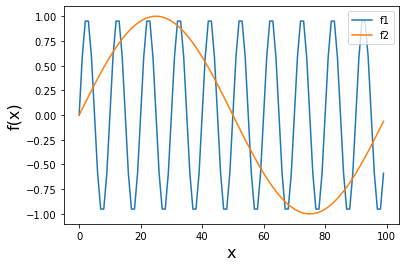

In [68]:
# Let us start with two sine curves, with different frequencies

x = np.arange(100)
freq1 = .1 # High frequency
freq2 = .01 # Low frequency
f1 = np.sin(2*np.pi*x*freq1)
f2 = np.sin(2*np.pi*x*freq2)

plt.plot(x,f1)
plt.plot(x,f2)

plt.xlabel('x',fontsize='16')
plt.ylabel('f(x)',fontsize='16')
plt.legend(('f1','f2')) # This adds a legend so that we know which line is which

What would you expect if we took the Fourier Transform of each of these functions? The Fourier transform should have a large amplitude at the frequency of the sine curve, with zero amplitude at other frequencies.


As mentioned above, we are interested in the amplitude of the Fourier transform at different frequencies. In python, the amplitude can be calculated using the `np.abs` function within numpy. This function nominally calculates the absolute value of a number, but also calculates the amplitude of a complex number.

>**Q:** The code below calculates the Fourier transform for the two functions above, and then plots the amplitude as a function of frequency. But it is missing some pieces related to the graphs. Fill in the missing pieces so as to label the graphs.

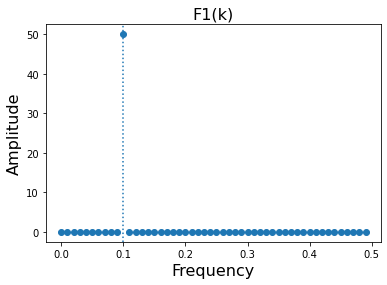

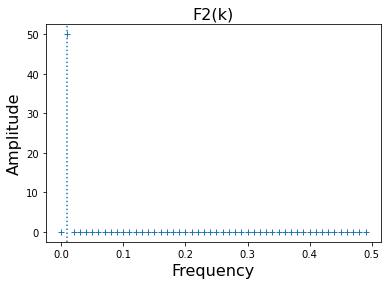

In [69]:
fft1 = np.fft.fft(f1) #Take the one-dimensional Fourier Transform
fft2 = np.fft.fft(f2)


freq = np.fft.fftfreq(f1.shape[0]) #Calculates the frequencies
N=len(freq)

plt.plot(freq[:N//2],np.abs(fft1)[:N//2],'o') #The second half of the frequency list is filled with negative frequencies. We will ignore them for now
#Add a vertical line at freq1
# Label the X-axis as Amplitude and label the y-axis as Frequency
# Add a title indicating that this figure is the Fourier Transform of f1(x)
plt.axvline(freq1,ls=':')
plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')
plt.title('F1(k)',fontsize='16')
plt.show()

plt.plot(freq[:N//2],np.abs(fft2)[:N//2],'+')
#Add a vertical line at freq2
# Label the X-axis as amplitude and label the y-axis as Frequency
# Add a title indicating that this figure is the Fourier Transform of f2(x)
plt.axvline(freq2,ls=':')
plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')
plt.title('F2(k)',fontsize=16)
plt.show()

The Fourier Transform of $f1(x)$ has zero amplitude at all frequencies, except for one frequency. The same is true of the Fourier transform of $f2(k)$, but here the frequency at which it has non-zero amplitude is smaller, as expected.

Now lets consider a more complicated example

> **Q:** Create a variable `f3` that is the sum of `f1` and `f2`. Plot this new variable as a function of `x`, making sure to label the axes.


Text(0, 0.5, 'f3(x)')

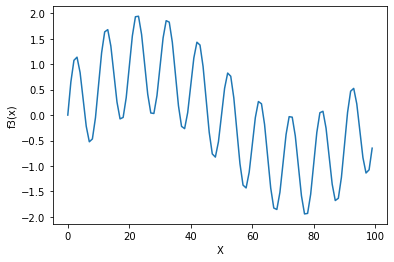

In [70]:
#insert code here
f3 = f1+f2
plt.plot(x,f3)
plt.xlabel('X')
plt.ylabel('f3(x)')

> **Q:** What do you predict for the Fourier transform of `f3`

**[insert answer here]**

> **Q:** Compute and plot the fourier transform of `f3`. What do you notice about the result?

**[insert answer here]**

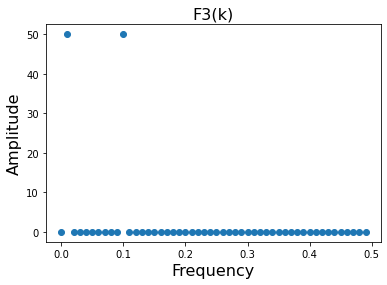

In [71]:
#insert code here
fft3 = np.fft.fft(f3) #Take the one-dimensional Fourier Transform


freq = np.fft.fftfreq(f3.shape[0]) #Calculates the frequencies
N=len(freq)

plt.plot(freq[:N//2],np.abs(fft3)[:N//2],'o') #The second half of the frequency list is filled with negative frequencies. We will ignore them for now
#Add a vertical line at freq1
# Label the X-axis as Amplitude and label the y-axis as Frequency
# Add a title indicating that this figure is the Fourier Transform of f1(x)
plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')
plt.title('F3(k)',fontsize='16')
plt.show()

Now lets look at a more complex case; a function that is zero everywhere, except for a narrow range of positions, where the value is one.

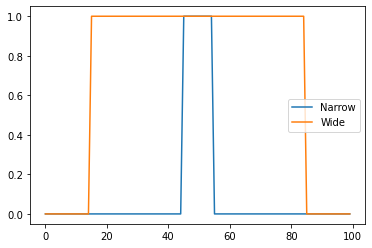

In [72]:
#Now let us consider something different: a step function
x = np.arange(100)
step1 = np.zeros(len(x))
step1[45:55] = 1 #A narrow step function 45:55
step2 = np.zeros(len(x))
step2[15:85] = 1 #A wider step function 15:85

plt.plot(x,step1)
plt.plot(x,step2)
plt.legend(('Narrow','Wide'))
#Add a legend and label the X and Y axis

Text(0.5, 0, 'Frequency')

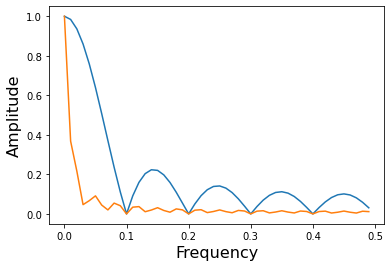

In [73]:
#Lets calculate the Fourier Transform of these two functions
fft_step1 = np.fft.fft(step1) #insert code to calculate the Fourier Transform of step1
fft_step2 = np.fft.fft(step2) #insert code to calculate the Fourier Transform of step2

freq = np.fft.fftfreq(step1.shape[0])
N=len(freq)
plt.plot(freq[:N//2],(np.abs(fft_step1)[:N//2])/np.max(np.abs(fft_step1)[:N//2]))
plt.plot(freq[:N//2],(np.abs(fft_step2)[:N//2])/np.max(np.abs(fft_step2)[:N//2]))

plt.ylabel('Normalized Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')


Now, instead of having a non-zero amplitude at a single frequency, we have a non-zero amplitude at a wide range of frequencies. The difference in the two Fourier transforms reflects differences in the shape of the two step functions. 

> **Q:** Which frequency component is the strongest in both Fourier transforms?

**[insert answer here]**

> **Q:** How does the shape differ between the two curves? How is this related to the width of the step? 

**[insert answer here]**

One application of the Fourier Tranform of a step function is in optical telescopes. The illumination of the primary mirror by photons by a distant object is similar to the step function (the mirror collects photons that fall onto its surface, but misses photons that fall outside of its surface). The width of the step function corresponds to the diameter of the telescope.

The Fourier transform of the illumination pattern (in particular, the square of the amplitudes) is then the image that is created on our CCD detector. In this case the x-axis of the Fourier transform is position on the detector, while the y-axis is related to the strength of the signal. In the example above you saw that the wider step function, corresponding to a telescope with a larger diameter mirror, produced a narrower signal, as expected from the relation between telescope diameter and angular resolution ($\theta = \lambda / D$).

This behavior allows us to consider more complex situations.
>**Q:** A secondary mirror will block out some of the light from reaching the primary mirror. This can be modeled as a step function in which a region in the middle has a value of zero. Take `step2` and set the values between position 40 and 60 to 0. Calculate and plot the Fourier Transform of this new step function. How does it differ from the case when there is no secondary mirror?


Text(0.5, 0, 'Frequency')

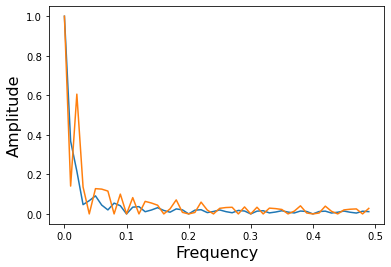

In [74]:
#insert code here
step3 = np.zeros(len(x))
step3[15:85] = 1
step3[40:60] = 0
fft_step3 = np.fft.fft(step3)
plt.plot(freq[:N//2],np.abs(fft_step2)[:N//2]/np.max(np.abs(fft_step2)[:N//2]))
plt.plot(freq[:N//2],np.abs(fft_step3)[:N//2]/np.max(np.abs(fft_step3)[:N//2]))

plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')

We will stop here for now, but you can extend this idea further to simulate the images generated in more complex situations, like a circular secondary mirror held up by narrow arms, or a series of mirror segments, like with JWST.

### Two-dimensional Fourier transforms

As discussed above, the signal measured by a radio interferometer is the two-dimensional Fourier transform of the image on the sky. That Fourier transform is sampled at different frequencies, corresponding to the distances between pairs of antennas. The incomplete sampling of frequencies leads to complications when trying to reconstruct an image.

Lets load a non-astronomical image and see what the two-dimensional Fourier Transform looks like.

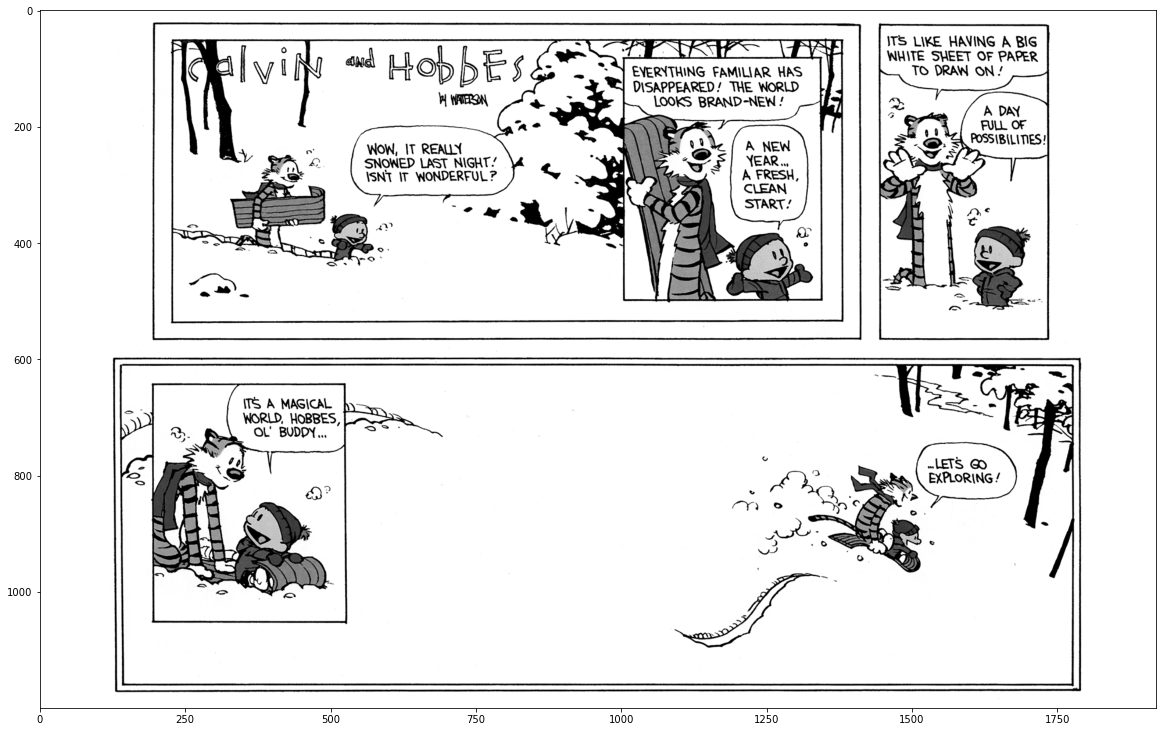

In [75]:
ch_image = plt.imread('CH_last-ConvertImage.png') #Load in the image
fig = plt.figure(figsize=(20,20)) #Make the image bigger than normal so that it is legible.
plt.imshow(ch_image,plt.cm.gray) #Show the image

Now lets take the Fourier Transform of this image and see what it looks like.

In [76]:
from matplotlib.colors import LogNorm

#Create a function that will plot the 2D Fourier Transform on a logarithmic scale
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft),norm=LogNorm(vmin=5))
    plt.axvline(im_fft.shape[1]/2,color='r',ls='--')
    plt.axhline(im_fft.shape[0]/2,color='r',ls='--')
    plt.colorbar()

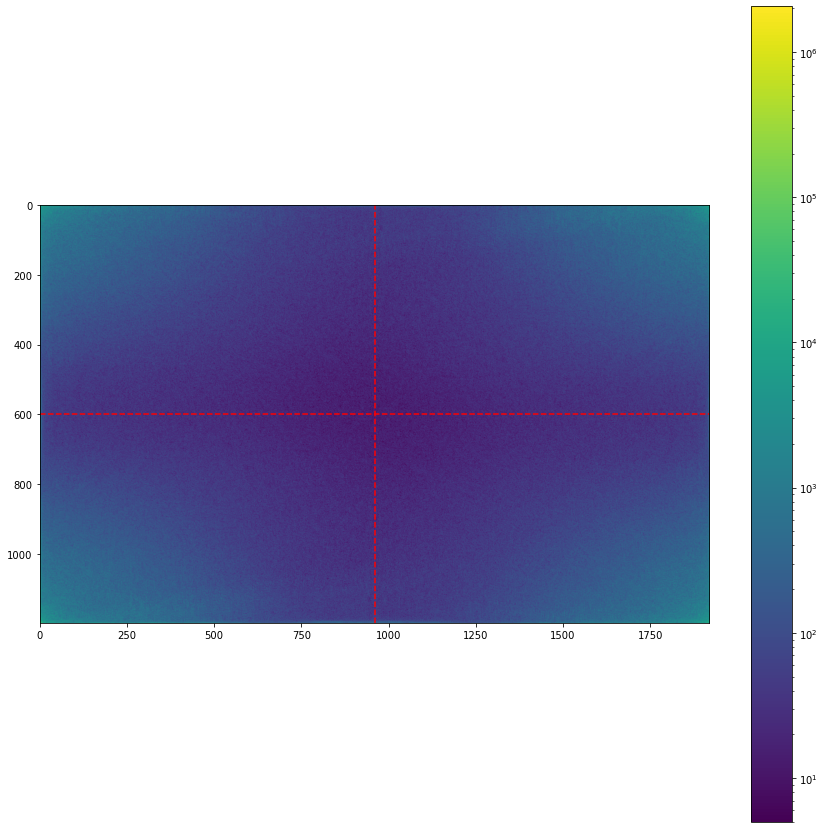

In [77]:
#Create and plot the Fourier Transform
fft_ch = np.fft.fft2(ch_image) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch)

We now have two frequencies ($k_x$ and $k_y$) corresponding to the two physical dimensions of the image. The X-axis on the Fourier transform corresponds to sine and cosines along the X-direction of the image (e.g. $\cos(2\pi k_x x)$) while the Y-axis on the Fourier Transform corresponds to sines and cosines along the Y-direction of the image (e.g. $\cos(2\pi k_y y)$). Note: the numbers on the axes above do not correspond to the frequencies, but simply the index number of the array containing the Fourier Transform.

The upper left position corresponds to $k_x$=0 and $k_y$=0. Moving along either axis the frequencies increase until reaching the halfway point (marked by the red lines). At this point the frequencies become negative and decrease back down to zero. This induces the symmetry in the Fourier Transform figure; the upper left (and upper right and lower right and lower left) correspond to $k_x=0$ and $k_y=0$ and hence have the sample amplitude.



In [78]:
# Answer the questions in the next two lines:
kx = np.fft.fftfreq(ch_image.shape[0]) #What does this line do?
ky = np.fft.fftfreq(ch_image.shape[1]) #What does this line do?
print('Number of frequencies in the X-direction: ',len(kx))
print('Number of frequencies in the Y-direction: ',len(ky))

# Check that the frequencies are zero in each of the corners
print('Frequency in upper left: {:0.1f},{:0.1f}'.format(kx[0],ky[0]))
print('Frequency in lower right: {:0.1f},{:0.1f}'.format(kx[-1],ky[-1]))
print('Frequency in lower left: {:0.1f},{:0.1f}'.format(kx[-1],ky[0]))
print('Frequency in upper right: {:0.1f},{:0.1f}'.format(kx[0],ky[-1]))

Number of frequencies in the X-direction:  1200
Number of frequencies in the Y-direction:  1920
Frequency in upper left: 0.0,0.0
Frequency in lower right: -0.0,-0.0
Frequency in lower left: -0.0,0.0
Frequency in upper right: 0.0,-0.0


>**Q:** What frequencies have the strongest signal in the Fourier Transform of the comic?

**[Insert answer here]**

>**Q:** What are the largest frequencies in the Fourier Transform?

**[Insert answer here]**

In [79]:
#insert code here
print(np.max(kx))
print(np.min(ky))

print(kx[np.argmax(fft_ch)])

0.4991666666666667
-0.5
0.0


If we reconstructed the image from this Fourier Transform we would exactly reproduce the original image. But radio interferometers do not collect information at every frequency, and we must attempt to recreate the image from this incomplete information. This affects the type of image that is reconstructed.

First lets consider an example in which we are missing information from high spatial frequencies

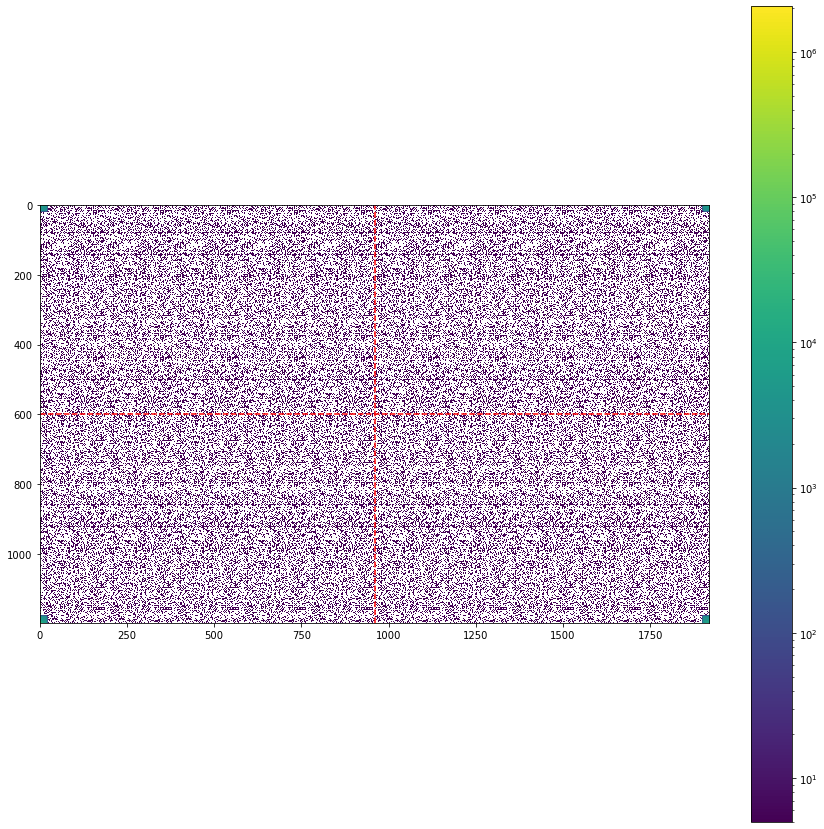

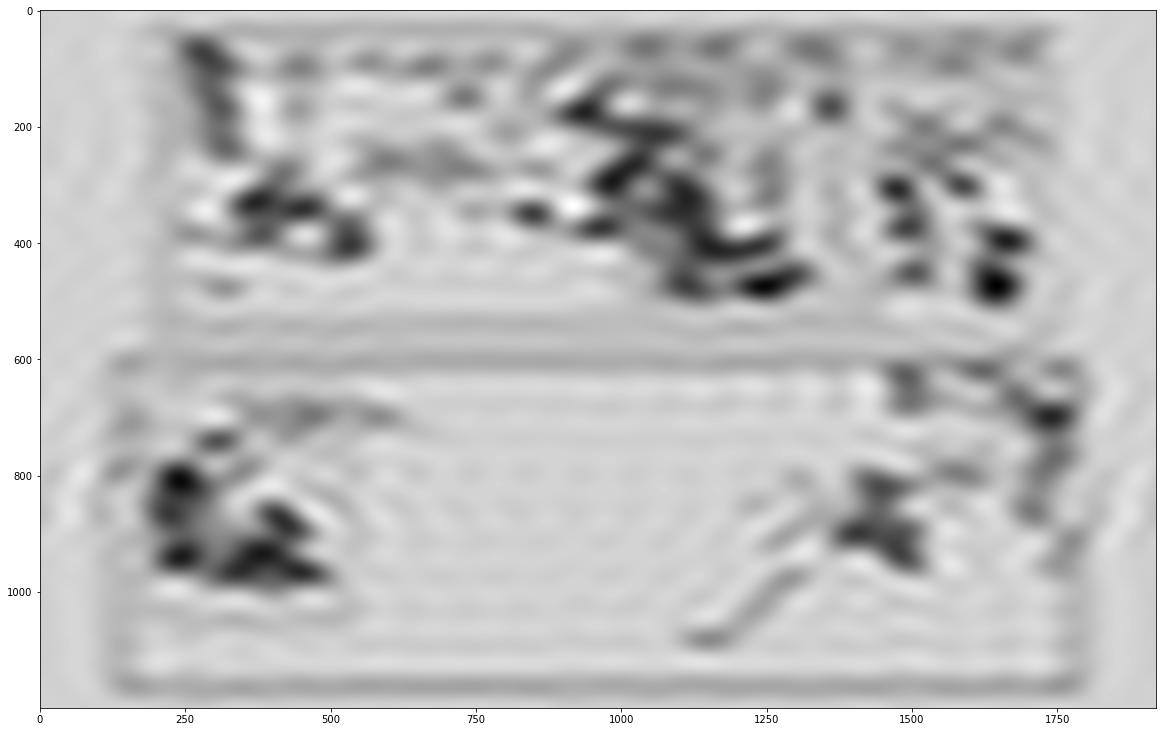

In [80]:
fft_ch_copy = fft_ch.copy() #Copy the Fourier Transform into a new variable
fig = plt.figure(figsize=(15,15))
fft_ch_copy[20:np.shape(fft_ch)[0]-20,:] = 0 #Set the Fourier Transform to zero everywhere except for the first, and last, twenty frequencies
fft_ch_copy[:,20:np.shape(fft_ch)[1]-20] = 0 #Same as above but in the Y-direction
plot_spectrum(fft_ch_copy) #Plot the Fourier Transform so we can see the damage that we have done
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real #Take the inverse Fourier Transform, which reconstructs an image
plt.imshow(new_ch,plt.cm.gray)

>**Q:** The different frequencies correspond to features at different spatial scales in the image. Based on what you see above, do low frequencies contain information on large or small spatial scales in an image?

**[insert answer here]**

>**Q:** Do low frequencies correspond to radio antennas that are close together or far apart? 

**[insert answer here]**

>**Q:** In the block below, reconstruct an image that is built from a scenario in which the 20 lowest frequencies are set to zero, while the high frequency information is preserved. What features appear in this image that were missing from the previous image?

**[insert answer here]**


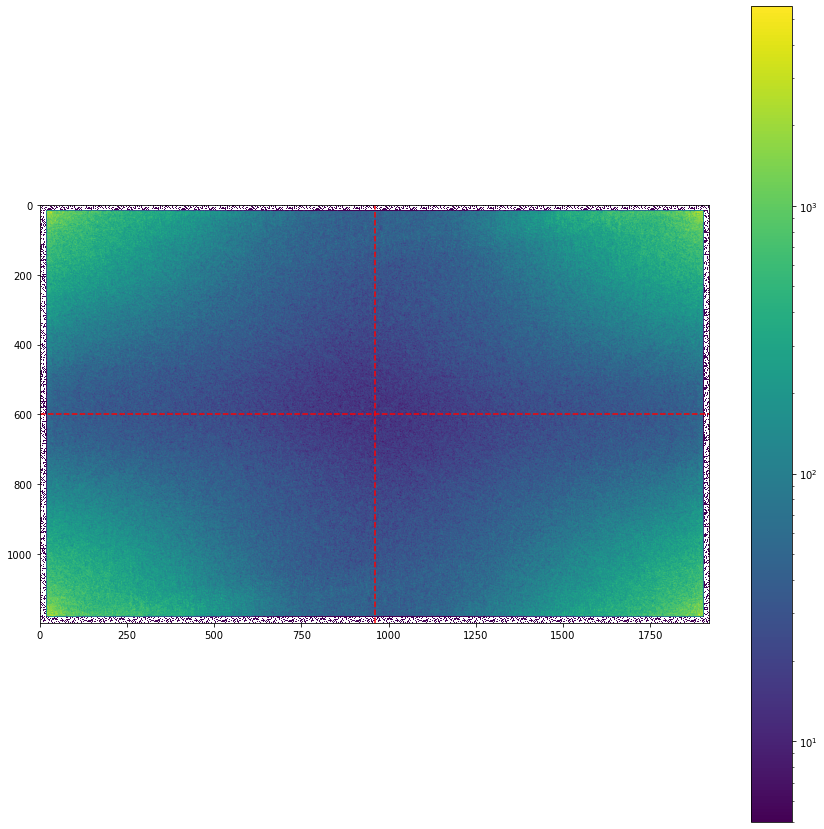

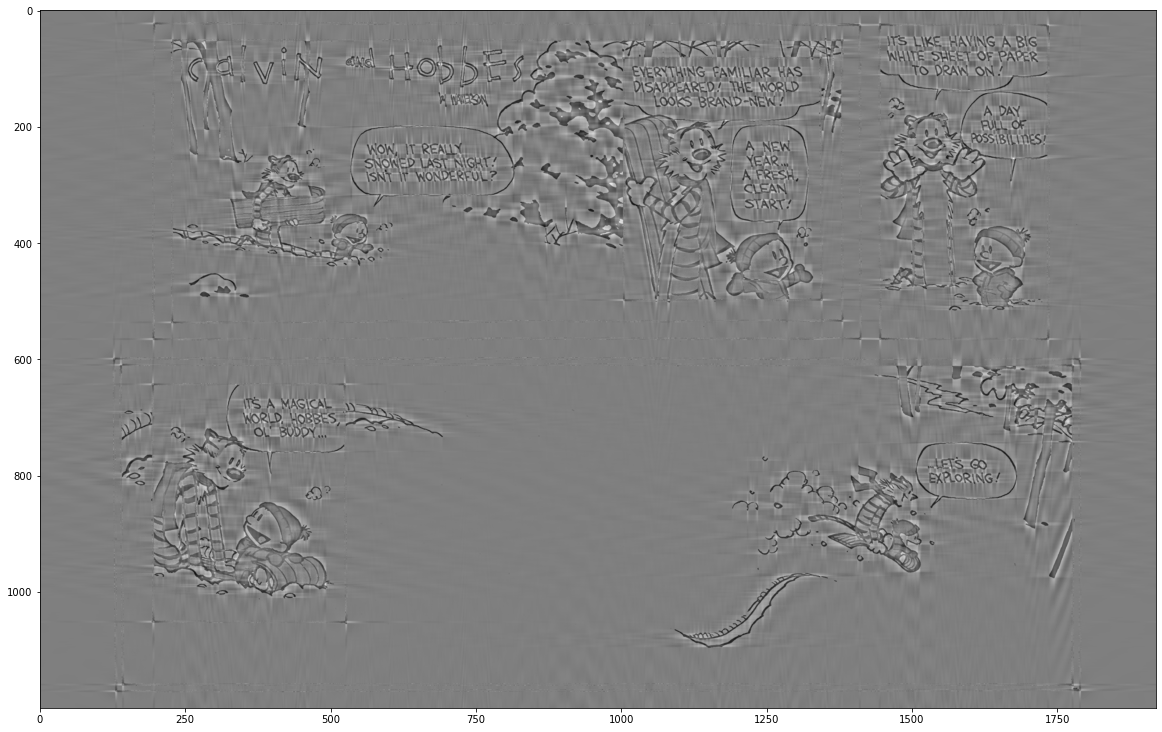

In [81]:
#insert code here
fft_ch_copy = fft_ch.copy()
fft_ch_copy[:20,:] = 0
fft_ch_copy[np.shape(fft_ch)[0]-20:,:] = 0
fft_ch_copy[:,:20] = 0
fft_ch_copy[:,np.shape(fft_ch)[1]-20:] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch_copy)
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real
plt.imshow(new_ch,plt.cm.gray)

What happens if we are missing *some* of the short or long frequency measurements? This causes additional complications.

Below we consider the artificial example in which we are missing the information from every tenth frequency. 

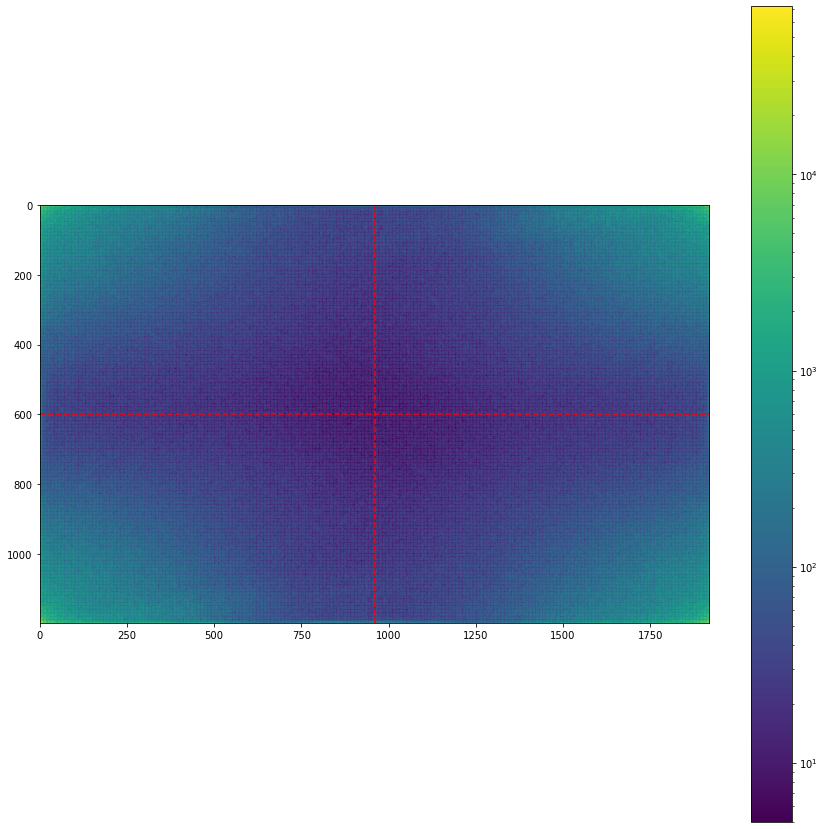

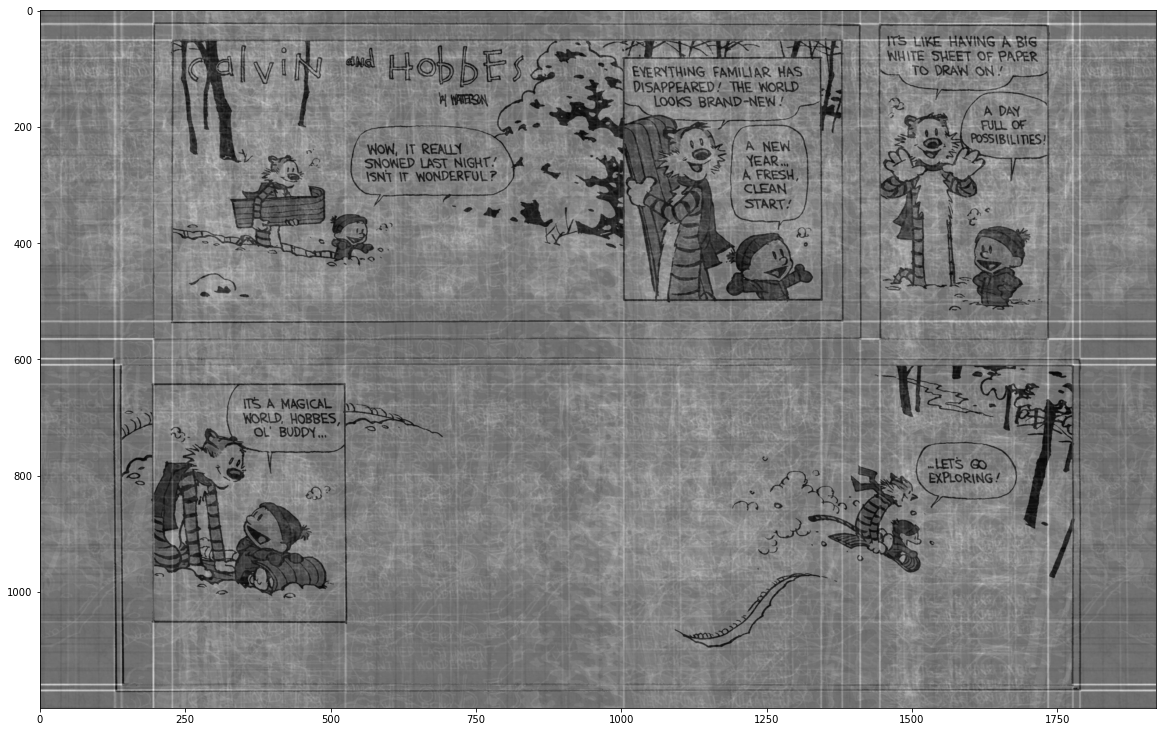

In [82]:
fft_ch_copy = fft_ch.copy()
fft_ch_copy[::10,:] = 0 #Simulates a situation in which are missing information on every tenth frequency 
fft_ch_copy[:,::10] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch_copy)
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real
plt.imshow(new_ch,plt.cm.gray)

The missing information leads to a host of artifacts within the reconstructed image including structures that were not present in the original image. This can cause complications if we were to e.g. measure the 'flux' from a region of this image. 

Now lets examine the effect this has on real data, by using one of the images of M101 and its supernova that we have looked at in the past.

As discussed above, low and high frequency information corresponds to different separations between telescopes. For a radio interferometric array the telescopes are often moveable, which means you can choose a configuration for the telescopes, depending on what is best for your science. For example you can choose to:
* Place all of the telescopes close together. 
* Spread out the telescopes as much as possible. 
* Keep some telescopes close together, while spreading out some of the telescopes over large distances. 

There are advantages and disadvantes to each of these choices. On Glow you will find three fits images. They represent reconstructed images using:
* Only low frequencies (M101_lowonly.fits)
* Only high frequencies (M101_highonly.fits)
* A mix of high and low frequencies (M101_low+high.fits)

> **Q:** Examine the images in ds9 and in the space below describe what the images look like. What features do you see in the different images? What is similar or different between the images? Are there any artifacts and if so what do they look like?

**[insert answer here]**

> **Q:** What is the SNR of the supernova in each of the images? How does the total flux of the supernova, and its noise, change between the different images? Calculate the SNR for these elements as you did in lab 5, by selecting out regions in the image that represent background, and regions that represent signal, and using these regions to calculate the SNR. 

**[insert answer here]**

In [90]:
#Insert code here 

imagelow=fits.open('M101_lowonly.fits')
datalow = imagelow[0].data

bkg_low = datalow[800:1000,250:450]
SNflux_low = np.sum(datalow[590:640,290:330]-np.mean(bkg_low))
galflux_low = np.sum(datalow[480:540,460:550]-np.mean(bkg_low))
snnoise_low = np.std(bkg_low)*np.sqrt(50*40)
galnoise_low = np.std(bkg_low)*np.sqrt(60*90)
print('SN, low frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(SNflux_low,snnoise_low,SNflux_low/snnoise_low))
print('Gal, low frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(galflux_low,galnoise_low,galflux_low/galnoise_low))



imagehigh=fits.open('M101_highonly.fits')
datahigh = imagehigh[0].data

bkg_high = datahigh[800:1000,350:600]
SNflux_high = np.sum(datahigh[590:640,290:330]-np.mean(bkg_high))
galflux_high = np.sum(datahigh[480:540,460:550]-np.mean(bkg_high))
noise_high = np.std(bkg_high)*np.sqrt(50*40)
galnoise_high = np.std(bkg_high)*np.sqrt(60*90)
print('SN, high frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(SNflux_high,noise_high,SNflux_high/noise_high))
print('Gal, high frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(galflux_high,galnoise_high,galflux_high/galnoise_high))



imagemix=fits.open('M101_low+high.fits')
datamix = imagemix[0].data

bkg_mix = datamix[800:1000,250:450]
SNflux_mix = np.sum(datamix[590:640,290:330]-np.mean(bkg_mix))
galflux_mix = np.sum(datamix[480:540,460:550]-np.mean(bkg_mix))
noise_mix = np.std(bkg_mix)*np.sqrt(50*40)
galnoise_mix = np.std(bkg_mix)*np.sqrt(60*90)
print('SN, low+high frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(SNflux_mix,noise_mix,SNflux_mix/noise_mix))
print('Gal, low+high frequencies (flux, SNR): {:0.2f}+-{:0.2f}, {:0.2f}'.format(galflux_mix,galnoise_mix,galflux_mix/galnoise_mix))




SN, low frequencies (flux, SNR): 1724282.18+-779.83, 2211.09
Gal, low frequencies (flux, SNR): 2426190.84+-1281.40, 1893.39
SN, high frequencies (flux, SNR): 18814.46+-2940.93, 6.40
Gal, high frequencies (flux, SNR): -4158.79+-4832.45, -0.86
SN, low+high frequencies (flux, SNR): 1117114.29+-2008.42, 556.22
Gal, low+high frequencies (flux, SNR): 2393242.42+-3300.17, 725.19


> **Q:** What telescope configuration (close together, spread apart, or a mix of both) would you choose if you were interested in the total flux of the supernova? What if you were interested in the shape and structure of the galaxy? Why?

**[insert answer here]**


### To turn in this lab, share the lab with me using the *Share* button in the upper right.